In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import Linearregression

ImportError: cannot import name 'Linearregression' from 'sklearn.linear_model' (/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/__init__.py)

In [4]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
insurance = pd.read_csv('insurance.csv')

In [8]:
print(insurance.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


NameError: name 'plt' is not defined

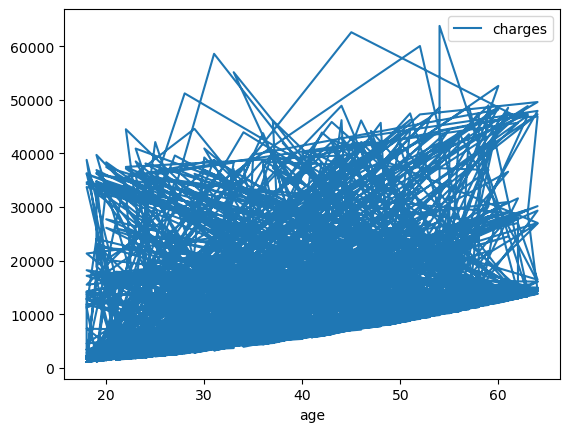

In [9]:
insurance.plot('age' , 'charges')
plt.show()

In [10]:
import matplotlib.pyplot as plt

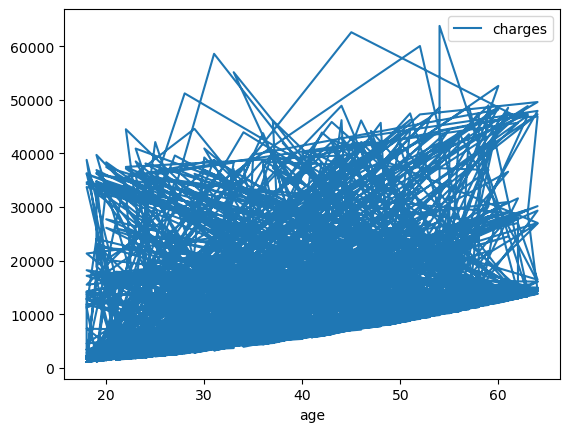

In [11]:
insurance.plot('age' , 'charges')
plt.show()

In [13]:
predictors = insurance[['age' , 'bmi']]

In [14]:
#The predictors that are chosen are age and bmi as they have the the highest corr with charges

In [15]:
X = insurance.drop('charges',axis=1)

In [16]:
y = insurance['charges']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=730)

In [20]:
model = LinearRegression()

In [21]:
X_train_sub = X_train[['age' , 'bmi']]

In [22]:
model.fit(X_train_sub,y_train)

LinearRegression()

In [23]:
insurance_corr = insurance.corr()

In [24]:
print(insurance_corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [28]:
insurance_inter =  model.intercept_

In [29]:
print(insurance_inter)

-8224.03028879358


In [30]:
train_pred = model.predict(X_train_sub)

In [52]:
train_mse = mean_squared_error(y_train,train_pred)

In [53]:
print(train_mse)

129188573.86619602


In [33]:
#The error is really high in this model

In [34]:
resi = y_train - train_pred

In [35]:
print(resi)

1164    -5612.669099
288     27408.105844
285     -5652.117079
384     -2901.734046
1330    -3212.778800
            ...     
1062    26838.071320
779     -6141.402298
222     -6174.930438
784     -6246.859108
260     -4054.502859
Name: charges, Length: 1070, dtype: float64


In [36]:
resi_mean = np.mean(resi)
print(resi_mean)

-1.1151935034823195e-12


In [37]:
#It comes close to 0 , the acual mean of residuals is -1.1151935034823195e-12

In [38]:
print(model.coef_)

[252.5721774  375.65503408]


In [39]:
print(model.intercept_)

-8224.03028879358


In [40]:
print(X_train_sub)

      age     bmi
1164   41  28.310
288    59  36.765
285    46  26.620
384    44  22.135
1330   57  25.740
...   ...     ...
1062   59  41.140
779    53  28.880
222    32  30.800
784    31  29.260
260    58  25.200

[1070 rows x 2 columns]


In [41]:
exp = pow(y_train - (insurance_inter + 252.5721774*X_train_sub['age'] + 
                     375.65503408 * X_train_sub['bmi']) , 2)

In [42]:
print(exp)

1164    3.150205e+07
288     7.512043e+08
285     3.194643e+07
384     8.420060e+06
1330    1.032195e+07
            ...     
1062    7.202821e+08
779     3.771682e+07
222     3.812977e+07
784     3.902325e+07
260     1.643899e+07
Length: 1070, dtype: float64


In [43]:
X_test_sub = X_test[['age' , 'bmi']]

In [44]:
test_pred = model.predict(X_test_sub)

In [45]:
test_mse = mean_squared_error(y_test , test_pred)
print(test_mse)

130614946.823021


In [46]:
print(train_mse)

129188573.86619602


In [47]:
#The test and train set gives similar mse vales and hence the model is alright in this aspect 

In [48]:
y_train_log = np.log2(y_train)

In [49]:
y_test_log = np.log2(y_test)

In [54]:
train_mse_2 = mean_squared_error(y_train_log , train_pred)
print(train_mse_2)

194388449.14569315


In [55]:
model.fit(X_train_sub , y_train_log)

LinearRegression()

In [56]:
train_pred_2 = model.predict(X_train_sub)

In [57]:
train_mse_2 = mean_squared_error(y_train_log , train_pred)
print(train_mse_2)

194388449.14569315
